# Attention on Multi Input Model

### Load libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Conv2D, Dense, Input, Flatten, MaxPool2D, Add

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Load Model

Create a model for test.
Here, It use the model of No learning.
But actually you should use the learned model.

In [2]:
input_a, input_b = [Input((224, 224, 3)) for i in range(2)]

def create_cnn(inputs):
    x = Conv2D(3, 3, activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(3, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(3, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    return x

x = Add()([create_cnn(input_a), create_cnn(input_b)])
x = Dense(2, activation='softmax')(x)

model = Model(inputs=[input_a, input_b], outputs=x)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 222, 222, 3)  84          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 222, 222, 3)  84          input_2[0][0]                    
__________________________________________________________________________________________________
max_poolin

### Load Image

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


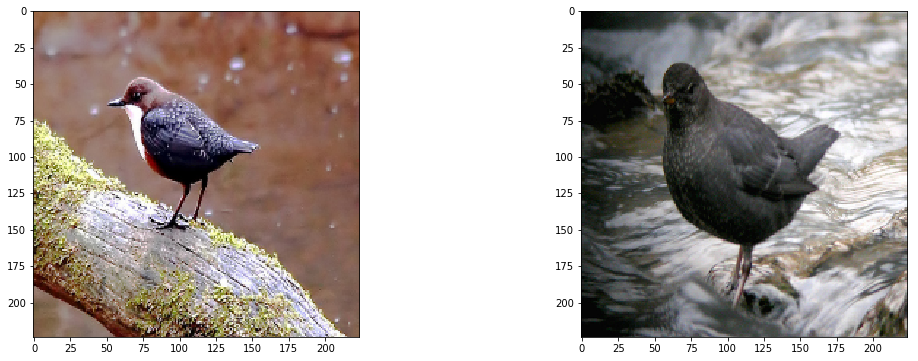

In [3]:
from vis.utils import utils
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('vggnet/images/ouzel1.jpg', target_size=(224, 224))
img2 = utils.load_img('vggnet/images/ouzel2.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

### Saliency

The `seed_input` option is a list of Image.

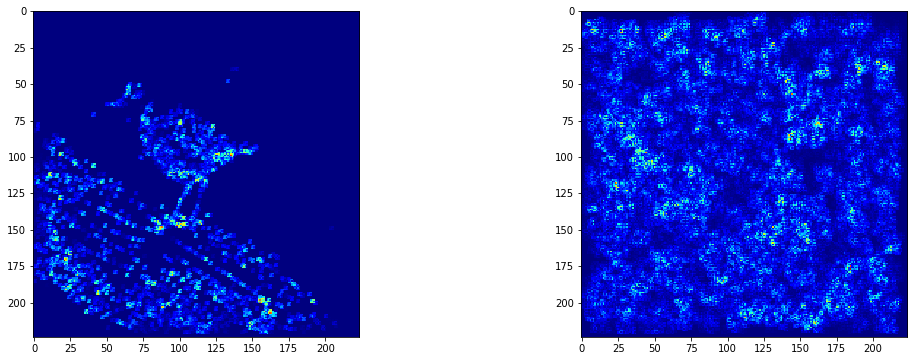

In [4]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

f, ax = plt.subplots(1, 2)
grads = visualize_saliency(model, -1, filter_indices=0, seed_input=[img1, img2])
ax[0].imshow(grads[0], cmap='jet')
ax[1].imshow(grads[1], cmap='jet')

##### Model's graph

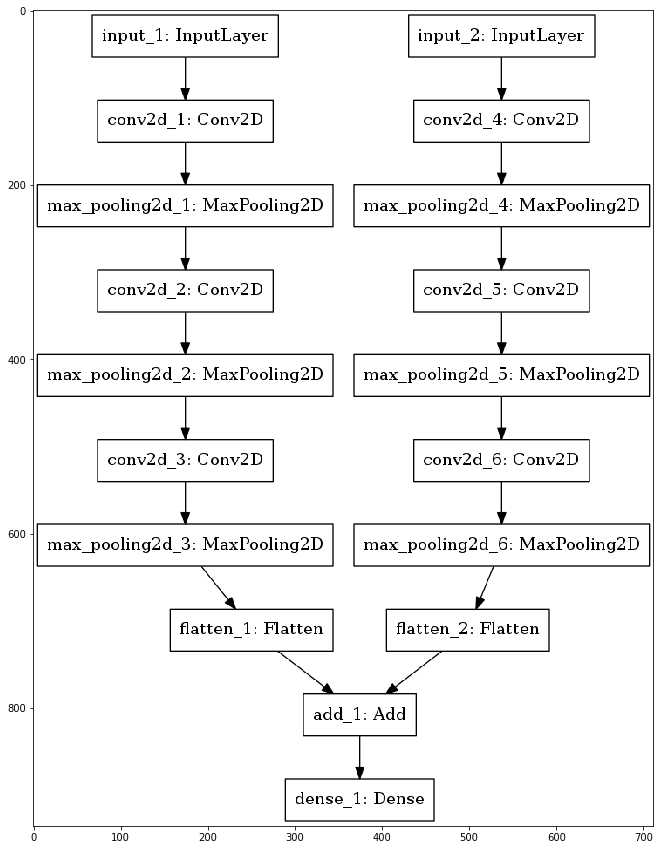

In [5]:
plt.rcParams['figure.figsize'] = (15, 15)
graph = utils.load_img('model.png')
plt.imshow(graph)

### GradCAM

In here, It's `layer_idx` option set to `-4` (i.e., `flatten_1`), So target convolutional layer is `conv2d_3` of left side of graph.

<Figure size 1296x432 with 0 Axes>

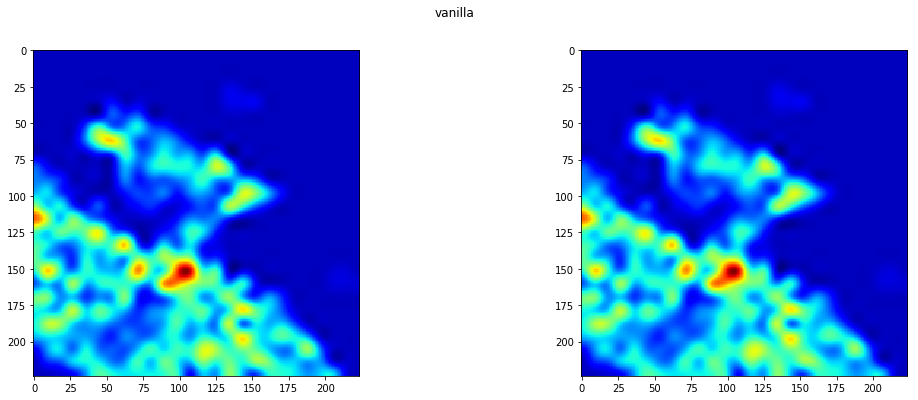

<Figure size 1296x432 with 0 Axes>

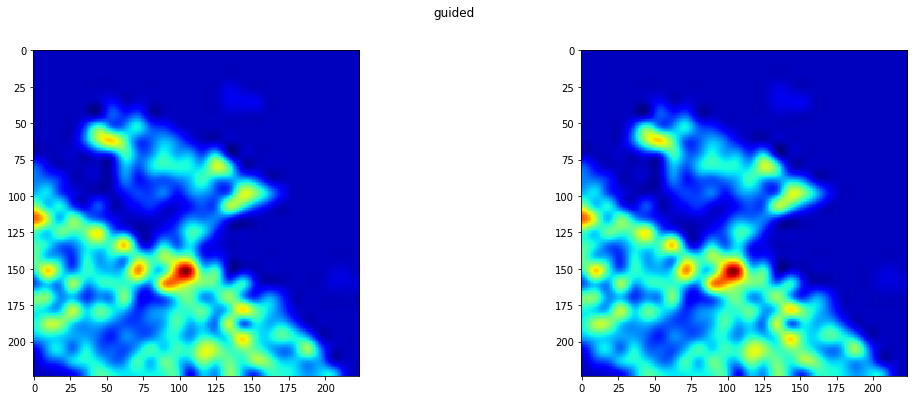

<Figure size 1296x432 with 0 Axes>

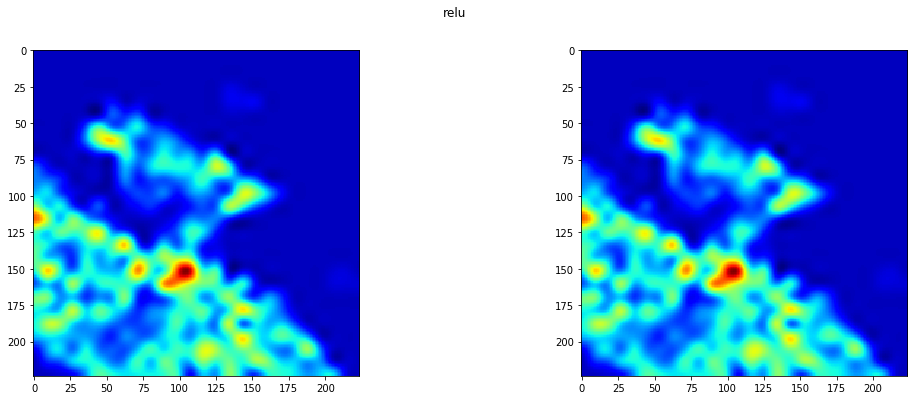

In [7]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam
plt.rcParams['figure.figsize'] = (18, 6)

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    grads = visualize_cam(model, -4, filter_indices=0,
                          seed_input=[img1, img2], backprop_modifier=modifier)
    ax[0].imshow(grads[0], cmap='jet')
    ax[1].imshow(grads[1], cmap='jet')